# __Vanilla Autoencoder with PyTorch__

In [1]:
# For auto saving and applying changes to modified files.
%load_ext autoreload
%autoreload 2

In [2]:
# Prepare Packages
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import sampler
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.transforms as T

# Comment these if you're using ucsd datahub, otherwise uncomment.
# from utilities.utils import *

# Comment these if you're not using ucsd datahub, otherwise uncomment.
import sys
sys.path.append('..')
from utilities.utils import *

In [3]:
# Prepare dataset
'''
    TRAIN_MNIST & TEST_MNIST are objects of type (or instances of) 
    `torchvision.datasets.MNIST`.
    
    Running `print(TRAIN_MNIST)` will print out all the information
    about the dataset: Number of datapoints, root location, etc.
    
    TRAIN_MNIST[i] is a tuple (xi, yi) where i is the ith
    datapoint, xi is a tensor, and yi is an integer label/class 
    of xi. Same concept applies to VAL_MNIST[i] & TEST_MNIST[i].
'''

# Declare necessary constants
USE_GPU = True
DTYPE = torch.float32
PATH = "./dataset"
    
transform = T.Compose(
    [
        T.ToTensor(),
        T.Resize(28)
    ]
)

TRAIN_MNIST = datasets.MNIST(
    root=PATH,
    train=True,
    download=True,
    transform=transform
)

VAL_MNIST = datasets.MNIST(
    root=PATH,
    train=True,
    download=True,
    transform=transform
)

TEST_MNIST = datasets.MNIST(
    root=PATH,
    train=False,
    download=True,
    transform=transform
)

num_workers = 6 # Hardcoded, obtained after running get_optimal_num_workers
if num_workers == None:
    num_workers = get_optimal_num_workers(TRAIN_MNIST, VERBOSE=False)

# Specify if use gpu and multiprocessors for training.
if USE_GPU and torch.cuda.is_available():
    DEVICE = torch.device('cuda')
    kwargs = {'num_workers': num_workers, 'pin_memory': True}
else:
    DEVICE = torch.device('cpu')
    kwargs = {}
    
# Prepare dataloaders
NUM_TRAIN = 50000

loader_TRAIN = DataLoader(TRAIN_MNIST, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)),
                          **kwargs)
loader_VAL = DataLoader(VAL_MNIST, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(TRAIN_MNIST))),
                        **kwargs)
loader_TEST = DataLoader(TEST_MNIST, batch_size=64,
                         **kwargs)

/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


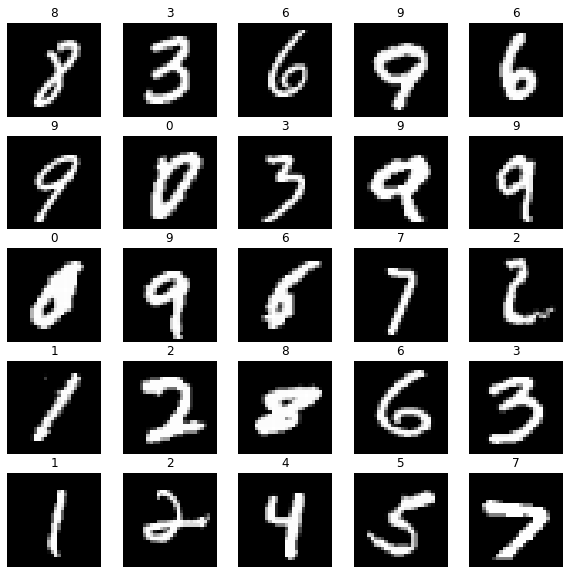

In [4]:
visualize_dataset(TRAIN_MNIST, type(TRAIN_MNIST))

In [5]:
# Wrap `utils.flatten()` function in a module
# in order to stack it in nn.Sequential.
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

# Some constants & hyperparameters
C, W, H = 1, 28, 28
NUM_CLASSES = 10
MOMENTUM = 0.9
LEARNING_RATE = 1e-2
PRINT_EVERY = 100
EPOCHS = 1
LOSS_FUNC = F.cross_entropy

In [6]:
# -------------------------------
# Model: Simple Linear Classifier
# -------------------------------
model = nn.Sequential(
    Flatten(),
    nn.Linear(C*W*H, NUM_CLASSES),
    nn.ReLU()
)

optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE,
                      momentum=MOMENTUM, nesterov=True)

train_PyTorch(model, optimizer, loader_TRAIN, loader_VAL,
              loss_function=LOSS_FUNC, print_every=PRINT_EVERY,
              dtype=DTYPE, device=DEVICE, epochs=EPOCHS)

Iteration 0, loss = 2.2917
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 947 / 10000 correct (9.47)

Iteration 100, loss = 1.1158
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 7770 / 10000 correct (77.70)

Iteration 200, loss = 0.7338
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8145 / 10000 correct (81.45)

Iteration 300, loss = 0.6349
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8297 / 10000 correct (82.97)

Iteration 400, loss = 0.4547
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8381 / 10000 correct (83.81)

Iteration 500, loss = 0.7408
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8485 / 10000 correct (84.85)

Iteration 600, loss = 0.8022
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8594 / 10000 correct (85.94)

Iteration 700, loss = 0.6917
Checking accuracy on validation set


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


Got 8658 / 10000 correct (86.58)

1 epochs completed...
